Para este ejercicio utilizaremos la libreria FSelectorRcpp:

- Documentacion: https://cran.r-project.org/web/packages/FSelectorRcpp/FSelectorRcpp.pdf

In [1]:
install.packages("FSelectorRcpp")

package 'FSelectorRcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'FSelectorRcpp'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\aberian\Documents\R\R-3.6.2\library\00LOCK\FSelectorRcpp\libs\x64\FSelectorRcpp.dll  a C:\Users\aberian\Documents\R\R-3.6.2\library\FSelectorRcpp\libs\x64\FSelectorRcpp.dll: Permission denied"
Warning message:
"restored 'FSelectorRcpp'"



The downloaded binary packages are in
	C:\Users\aberian\AppData\Local\Temp\RtmpamnWVA\downloaded_packages


In [6]:
# Cargamos dataset
raw_data <- read.csv(file = 'datos_ciudad.csv', header = T, sep = ';')
head(raw_data)

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


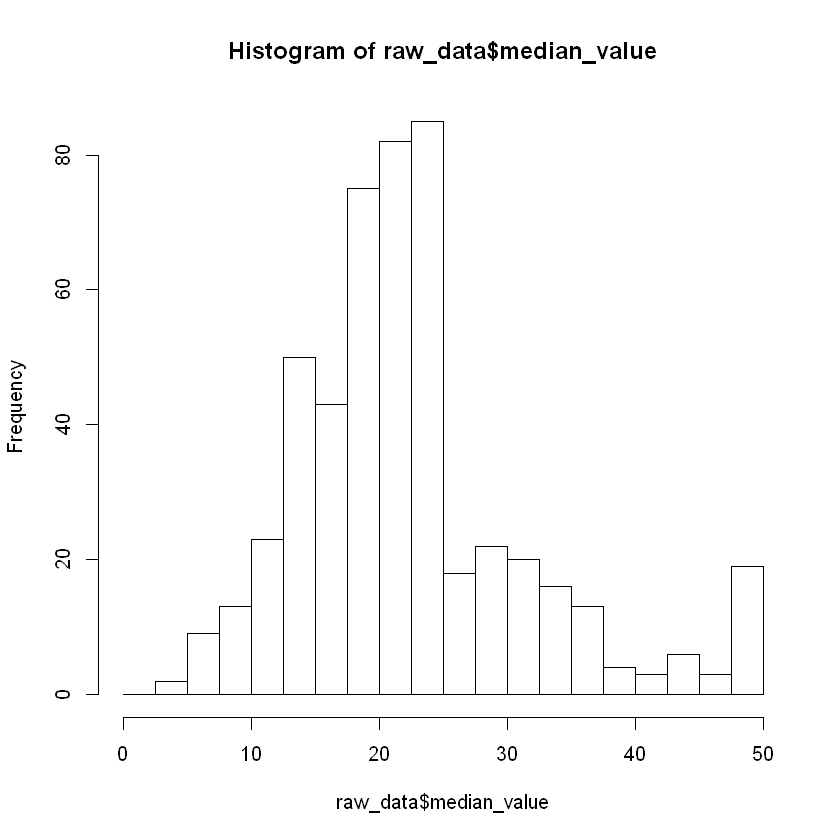

In [7]:
#Visualizamos el median_value y observamos que hay dos grupos que podmeos clasificar como vivienda cara y vivienda barata
hist(raw_data$median_value
     , breaks = seq(0,50,2.5))

In [8]:
#Definimos la variable target:
raw_data$target <- ifelse(raw_data$median_value > 37.5, 1, 0)
head(raw_data$target)
head(raw_data)

[1] 0 0 0 0 0 0

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value,target
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


In [9]:
print("Instancias con valor de vivienda alto:")
sum(raw_data$target)

print("Numero total de instancias:")
nrow(raw_data)

print("Proporcion de viviendas de valor alto sobre el total:")
round(1 - sum(raw_data$target) / nrow(raw_data),4) * 100

[1] "Instancias con valor de vivienda alto:"


[1] 35

[1] "Numero total de instancias:"


[1] 506

[1] "Proporcion de viviendas de valor alto sobre el total:"


[1] 93.08

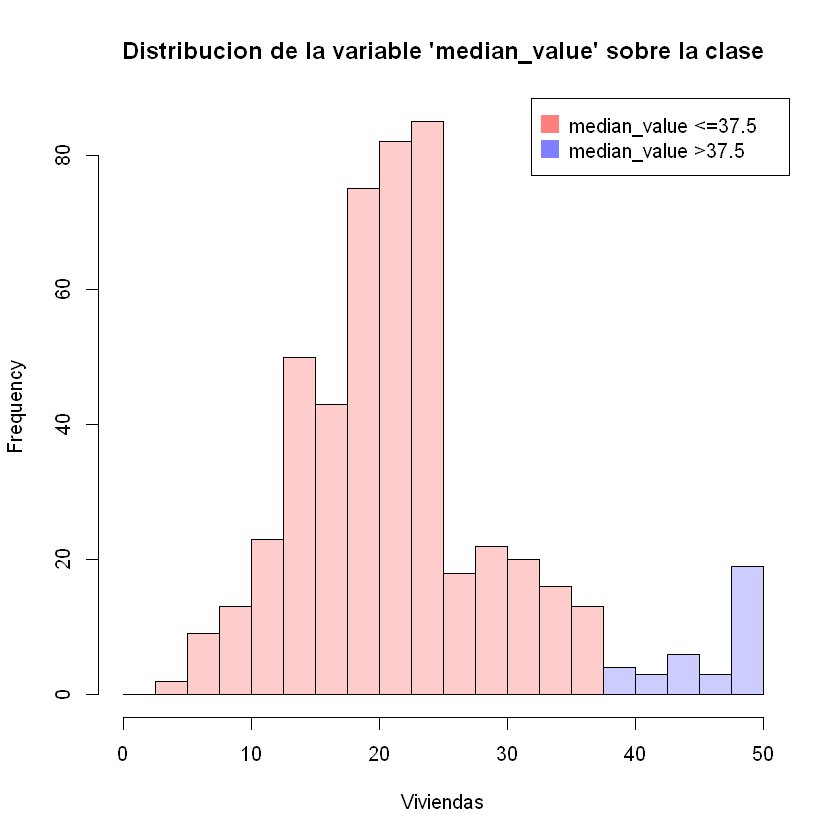

In [10]:
#Visualizamos el median_value y observamos que hay dos grupos que podmeos clasificar como vivienda cara y vivienda barata
hist(subset(raw_data, target == 0)$median_value
     , breaks = seq(0,50,2.5)
     , col=rgb(1,0,0,0.2)
     , xlim=c(0,50)
     , main="Distribucion de la variable 'median_value' sobre la clase"
     , xlab = 'Viviendas')

hist(subset(raw_data, target == 1)$median_value
     , breaks = seq(0,50,2.5)
     , col=rgb(0,0,1,0.2)
     , xlim=c(0,50)
     , add=T)

# Add legend
legend("topright"
    , legend=c("median_value <=37.5"
               ,"median_value >37.5")
       , col=c(rgb(1,0,0,0.5)
               , rgb(0,0,1,0.5))
       , pt.cex=2
       , pch=15 )

## Correlación

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


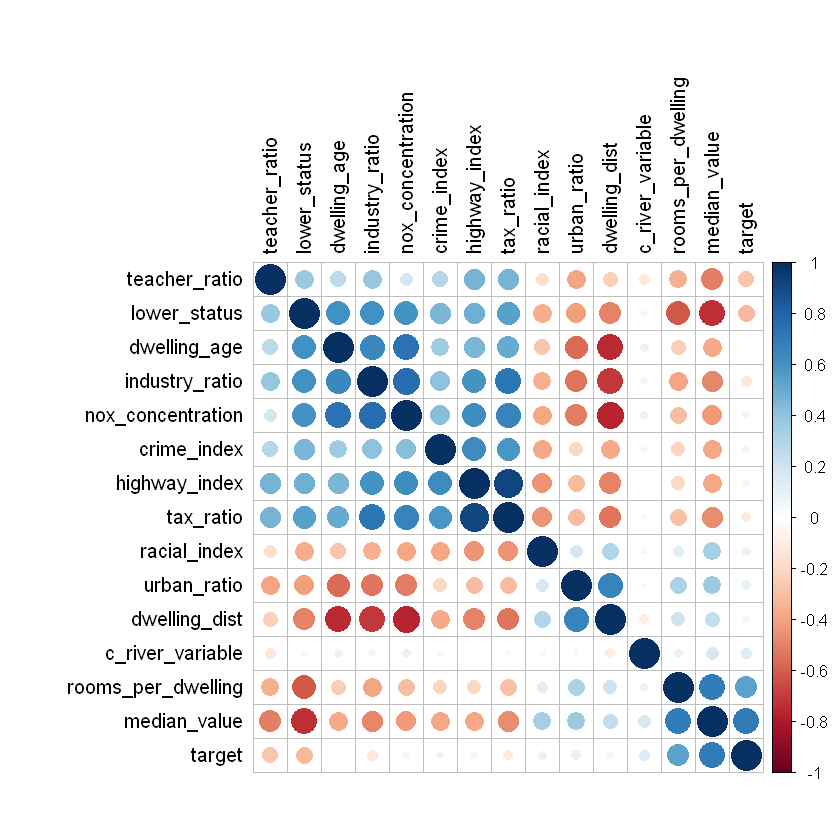

In [11]:
#Hacemos estudio de correlacion para entender las variables que tienen una relacion lineal
library(corrplot)
corrplot::corrplot(cor(raw_data)
                   , number.cex = .6
                   , order = "hclust"
                   , tl.col = "black"
                   , tl.srt = 90)

In [12]:
cor(raw_data)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value,target
crime_index,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.352734251,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046,-0.070334909
urban_ratio,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.569537342,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453,0.099205295
industry_ratio,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.644778511,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252,-0.120286870
c_river_variable,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.086517774,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602,0.140552017
nox_concentration,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.731470104,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208,-0.063332389
rooms_per_dwelling,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.240264931,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599,0.534147967
dwelling_age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.000000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546,-0.002055504
dwelling_dist,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.747880541,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287,-0.060448023
highway_index,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.456022452,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262,-0.061090574
tax_ratio,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.506455594,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359,-0.110802490


## PCA

In [14]:
raw_data_no_target <- raw_data
raw_data_no_target$target <- NULL # eliminamos la columna class
raw_data_no_target$median_value <- NULL # eliminamos la columna class, ya que los valores son los mismos
head(raw_data_no_target)
PCA<-princomp(raw_data_no_target, scores = T)
summary(PCA)

crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


Importance of components:
                            Comp.1     Comp.2      Comp.3       Comp.4
Standard deviation     175.5815025 78.9808688 28.57877951 16.314343154
Proportion of Variance   0.8058232  0.1630520  0.02134861  0.006956991
Cumulative Proportion    0.8058232  0.9688751  0.99022375  0.997180743
                            Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     7.052166068 5.2746280353 4.0039530542 3.0835837933
Proportion of Variance 0.001299952 0.0007272202 0.0004190445 0.0002485385
Cumulative Proportion  0.998480695 0.9992079149 0.9996269594 0.9998754979
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     1.8074464892 1.085637e+00 5.046300e-01 2.449075e-01
Proportion of Variance 0.0000853912 3.080715e-05 6.656232e-06 1.567785e-06
Cumulative Proportion  0.9999608891 9.999917e-01 9.999984e-01 9.999999e-01
                            Comp.13
Standard deviation     5.521250e-02
Proportion of Variance

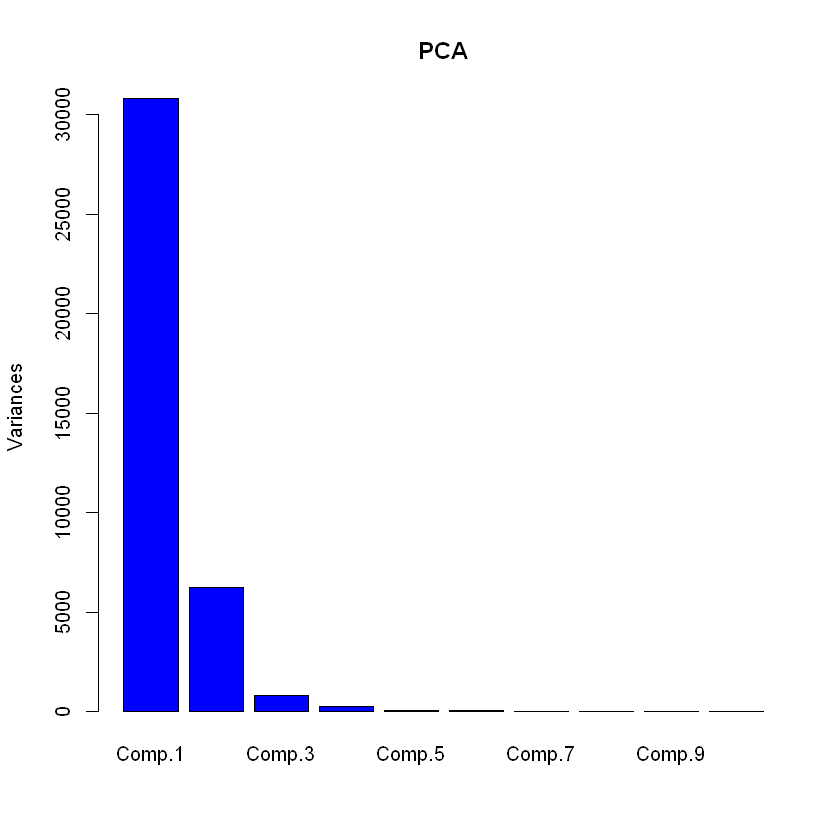

In [10]:
plot(PCA,type="bar",col="blue")

In [11]:
PCA$loadings


Loadings:
                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
crime_index                                     0.952  0.169  0.216  0.124
urban_ratio                      -0.633  0.768                            
industry_ratio                                        -0.344  0.786 -0.491
c_river_variable                                                          
nox_concentration                                                         
rooms_per_dwelling                                                        
dwelling_age                      0.756  0.637         0.109              
dwelling_dist                                                             
highway_index                                   0.172  0.209 -0.432 -0.854
tax_ratio           0.950 -0.292                                          
teacher_ratio                                                             
racial_index       -0.291 -0.956                                          
lower_status  

## Information Gain Algorithms:


- "infogain": ${H(Class)} + H(Attribute) − H(Class, Attribute)$

- "gainratio" : $H(Class) + H(Attribute) − H(Class, Attribute) / H(Attribute) $

- "symuncert" : $2 * (H(Class) + H(Attribute) − H(Class, Attribute)) / (H(Attribute) + H(Class)) $

where H(X) is Shannon’s Entropy for a variable X and H(X, Y) is a joint Shannon’s Entropy for a
variable X with a condition to Y.

In [30]:
#Con la funcion de information gain somos capaces de ver que atributos "esconden" informacuion sobre nuestra funcion de target
library(FSelectorRcpp)
i = information_gain(formula = target ~ .
                     , data = raw_data
                     , type = 'symuncert')
i

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


attributes,importance
<chr>,<dbl>
crime_index,0.00000000
urban_ratio,0.00000000
industry_ratio,0.05912294
c_river_variable,0.00000000
nox_concentration,0.00000000
rooms_per_dwelling,0.69197652
dwelling_age,0.00000000
dwelling_dist,0.00000000
highway_index,0.00000000


In [31]:
#Exploramos la informacion mutua obtenida de las variables 
information_gain(formula = rooms_per_dwelling ~ .
                 , data = raw_data
                 , type = 'infogain')

Warning message in .information_gain.data.frame(x = x, y = y, type = type, equal = equal, :
"Dependent variable is a numeric! It will be converted to factor with simple factor(y). We do not discretize dependent variable in FSelectorRcpp by default! You can choose equal frequency binning discretization by setting equal argument to TRUE."


attributes,importance
<chr>,<dbl>
crime_index,5.561975
urban_ratio,0.000000
industry_ratio,0.000000
c_river_variable,0.000000
nox_concentration,0.000000
dwelling_age,0.000000
dwelling_dist,0.000000
highway_index,0.000000
tax_ratio,0.000000


## Modelos

In [15]:
# Generamos nuevos modelos con las variables detectadas por la funcion de information gain y vemos que el teacher ratio tiene un pvalue demasiado alto por lo que probamos con otro modelo sin ese atributo
m1 <- glm(formula = target ~ lower_status + teacher_ratio + rooms_per_dwelling + industry_ratio + crime_index
          , data = raw_data
          , family = binomial)
summary(m1)


Call:
glm(formula = target ~ lower_status + teacher_ratio + rooms_per_dwelling + 
    industry_ratio + crime_index, family = binomial, data = raw_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2072  -0.1052  -0.0224  -0.0042   3.1587  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -15.97292    5.53043  -2.888 0.003875 ** 
lower_status        -0.64009    0.17262  -3.708 0.000209 ***
teacher_ratio       -0.20957    0.14280  -1.468 0.142203    
rooms_per_dwelling   2.80736    0.60416   4.647 3.37e-06 ***
industry_ratio       0.21210    0.06607   3.210 0.001325 ** 
crime_index          0.06968    0.03821   1.824 0.068220 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 254.504  on 505  degrees of freedom
Residual deviance:  84.298  on 500  degrees of freedom
AIC: 96.298

Number of Fisher Scoring iterations: 9


In [32]:
# Vemos que este modelo converge y ademas tiene un valor de AIC: 95.834 por lo que procedemos a hacer la matriz de confusion
m2 <- glm(formula = target ~ lower_status + rooms_per_dwelling + industry_ratio
          , data = raw_data
          , family = binomial)
summary(m2)


Call:
glm(formula = target ~ lower_status + rooms_per_dwelling + industry_ratio, 
    family = binomial, data = raw_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4633  -0.1334  -0.0299  -0.0059   3.1308  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -21.49432    4.58812  -4.685 2.80e-06 ***
lower_status        -0.56619    0.15516  -3.649 0.000263 ***
rooms_per_dwelling   3.04837    0.59451   5.128 2.94e-07 ***
industry_ratio       0.20549    0.06274   3.276 0.001055 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 254.504  on 505  degrees of freedom
Residual deviance:  87.834  on 502  degrees of freedom
AIC: 95.834

Number of Fisher Scoring iterations: 9


In [16]:
# Generamos las predicciones de nuestro modelo
m2_prob <- predict(m2, type = 'response')
head(m2_prob)

1           2           3           4           5           6 
0.021961521 0.003530005 0.396345132 0.201253740 0.093005900 0.012185970

In [17]:
# En base a las probabilidades sacamos la prediccion para cada instancia
m2_pred <- ifelse(m2_prob > 0.5, 1, 0)
head(m2_pred)

1 2 3 4 5 6 
0 0 0 0 0 0

In [18]:
library(caret)
c <- confusionMatrix(as.factor(m2_pred), as.factor(raw_data$target))
c

Loading required package: lattice

Loading required package: ggplot2



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 470   6
         1   1  29
                                          
               Accuracy : 0.9862          
                 95% CI : (0.9717, 0.9944)
    No Information Rate : 0.9308          
    P-Value [Acc > NIR] : 4.383e-09       
                                          
                  Kappa : 0.885           
                                          
 Mcnemar's Test P-Value : 0.1306          
                                          
            Sensitivity : 0.9979          
            Specificity : 0.8286          
         Pos Pred Value : 0.9874          
         Neg Pred Value : 0.9667          
             Prevalence : 0.9308          
         Detection Rate : 0.9289          
   Detection Prevalence : 0.9407          
      Balanced Accuracy : 0.9132          
                                          
       'Positive' Class : 0               
                              